In [3]:
""" import core extractor module """
import sys
sys.path.append("/home/woongjib/Projects/SBR/aac_analysis")
from utils import profile_decoding_output

from utility import get_audio_paths, draw_spec
import librosa
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import Audio, display

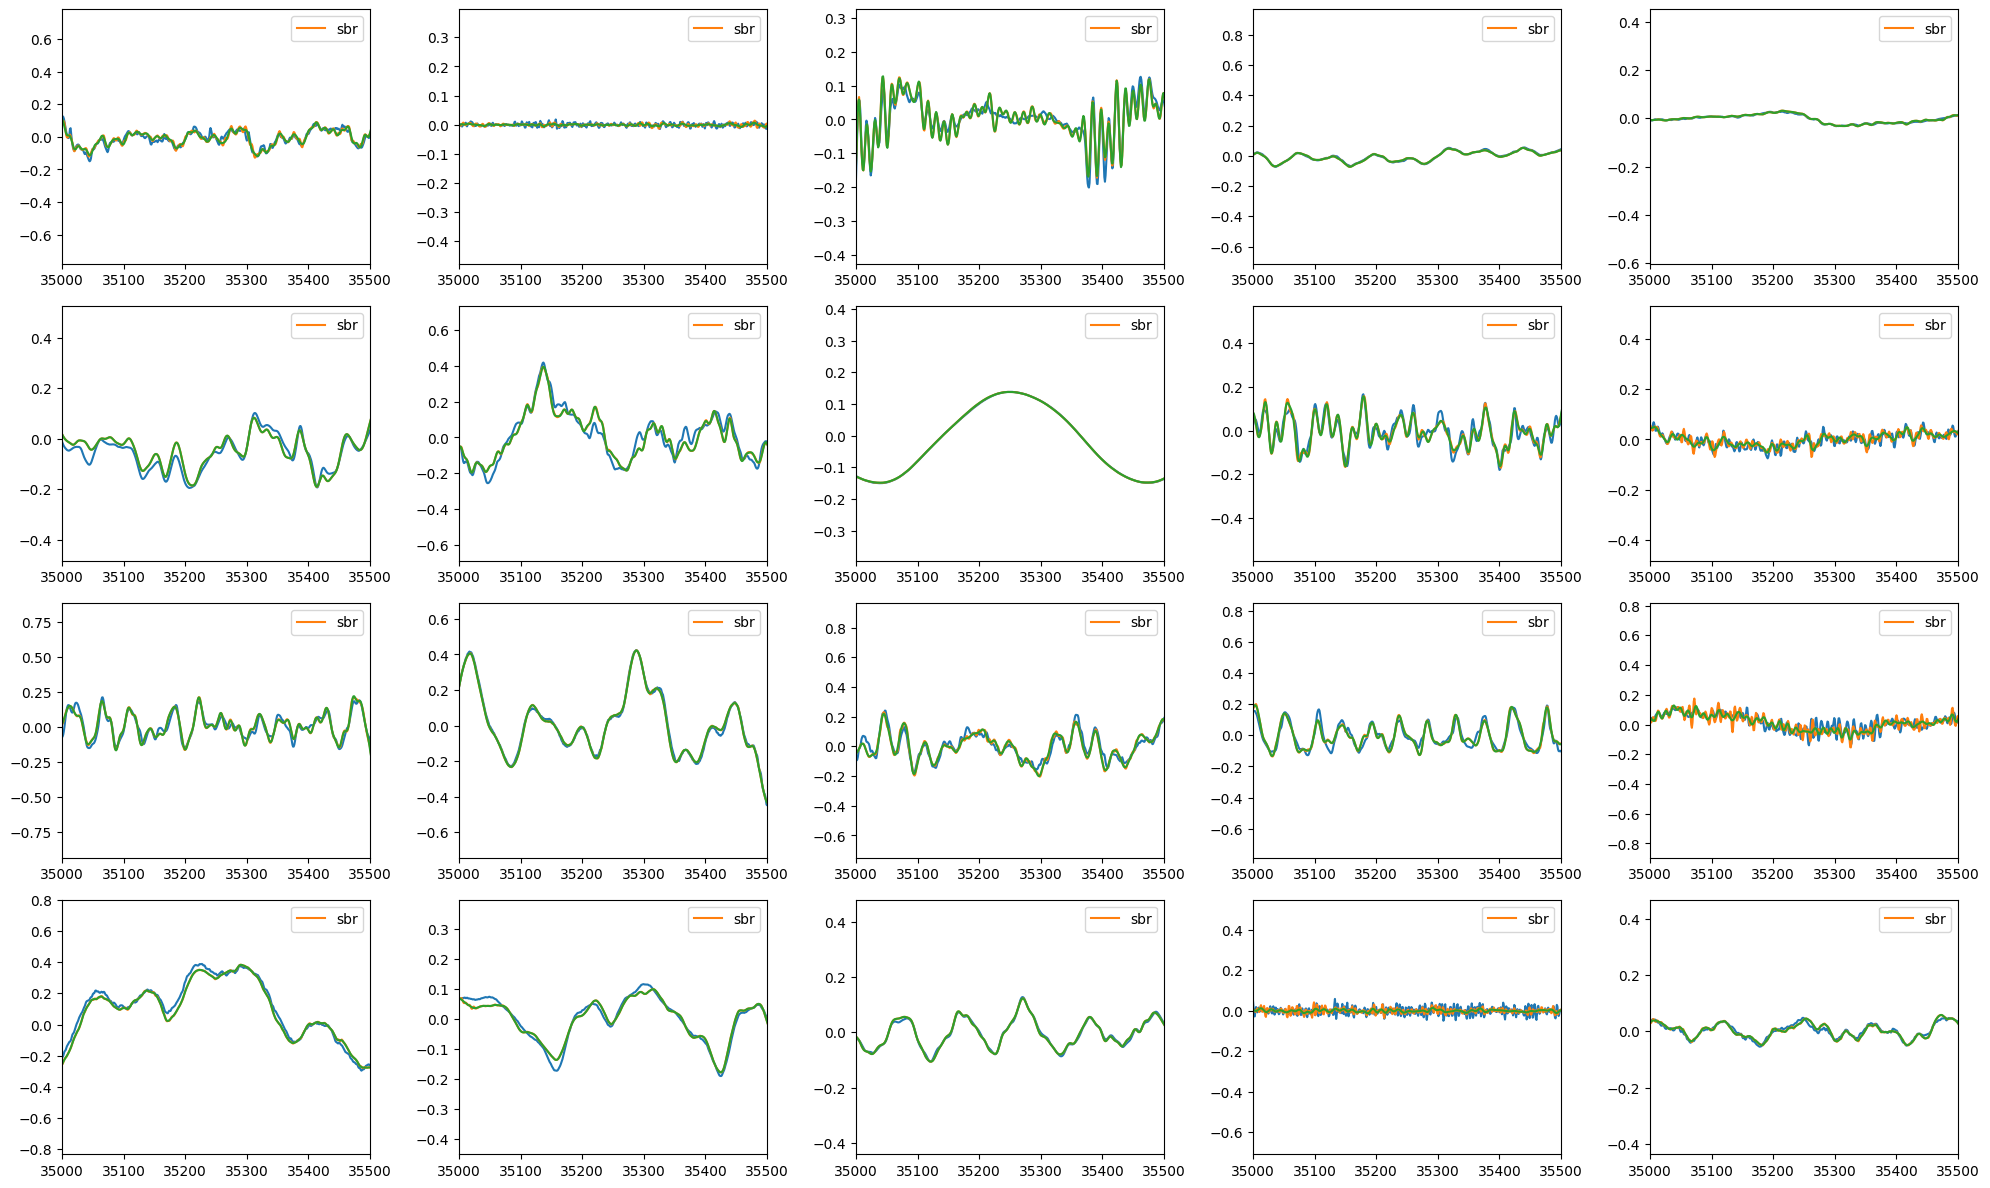

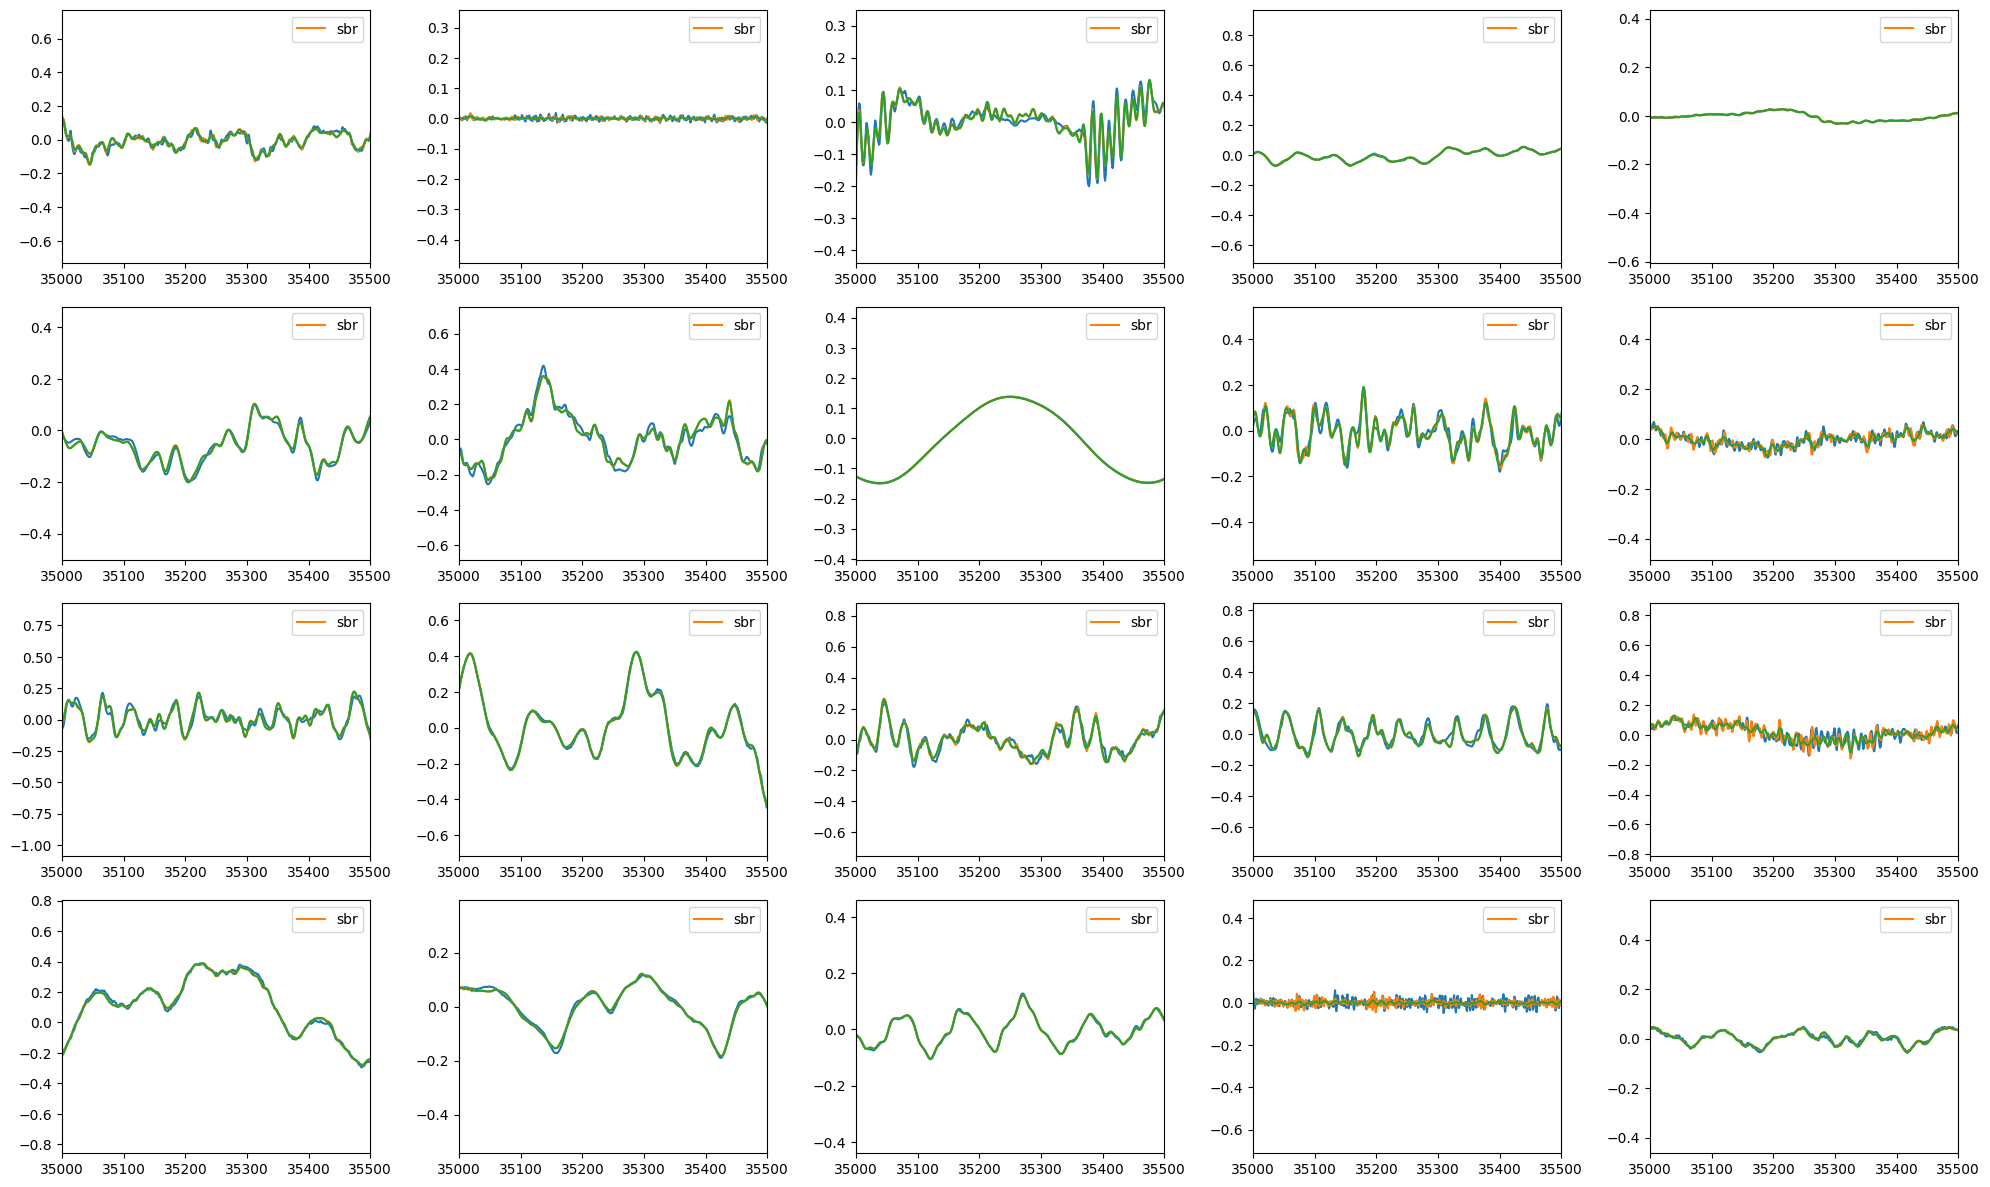

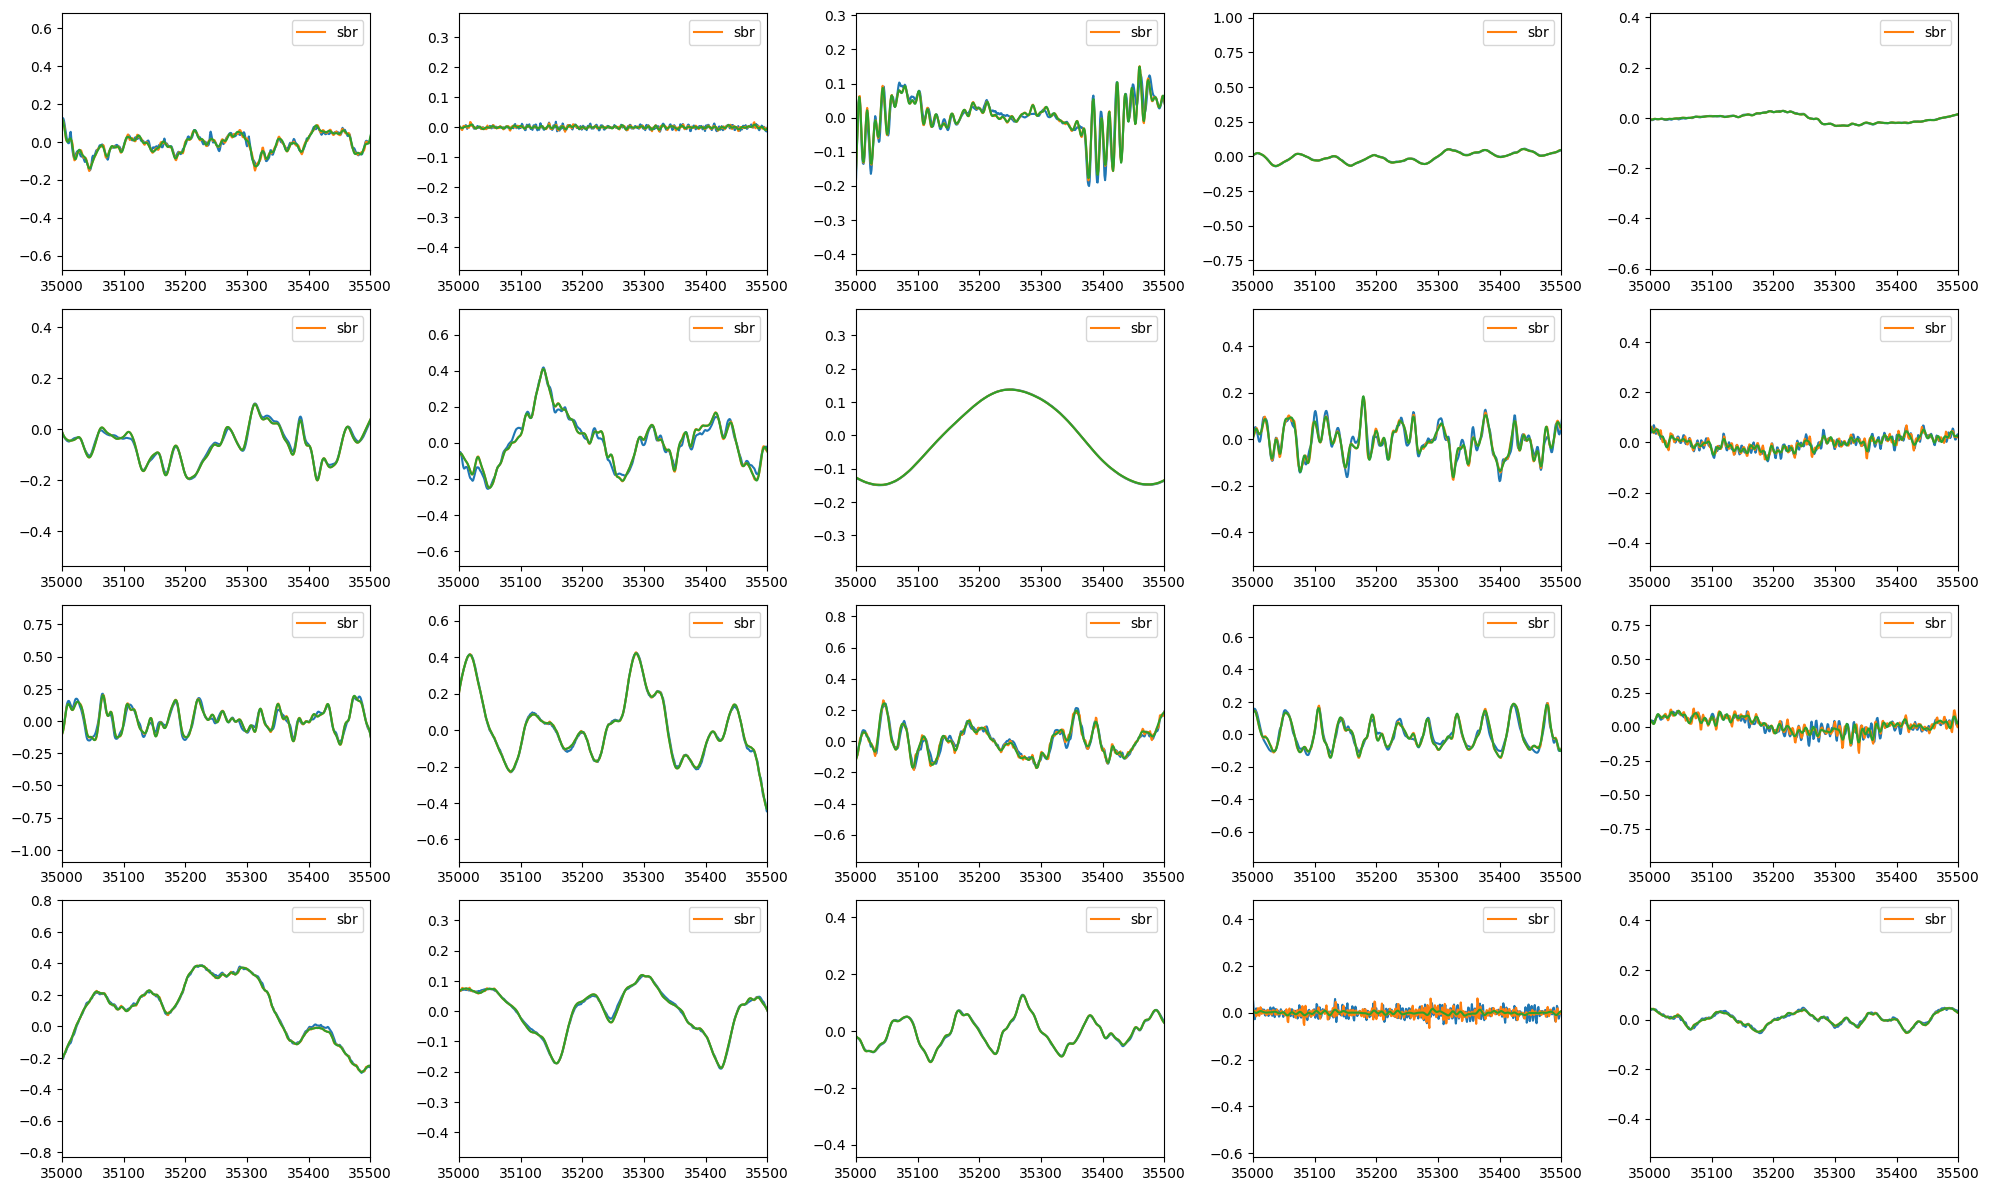

In [60]:
import soundfile
f = 20
for f in [12, 16, 20]:
    gt_path = "/home/woongjib/Projects/USAC/USAC44_GT"
    sbr_path = f"/home/woongjib/Projects/USAC/USAC44_{f}kbps"
    core_path = f"/home/woongjib/Projects/USAC/USAC44_{f}_core"

    gt_paths = get_audio_paths(gt_path, )
    sbr_paths = get_audio_paths(sbr_path, file_extensions=['.wav'])
    core_paths = get_audio_paths(core_path,)


    fig, axes = plt.subplots(4, 5, figsize=(20, 12))
    axes = axes.flatten()

    for idx in range(len(gt_paths)):
        gt,sr = librosa.load(gt_paths[idx], sr=None)
        sbr,sr = librosa.load(sbr_paths[idx], sr=None)
        core, sr = librosa.load(core_paths[idx], sr=None)

        # sbr = sbr[128:128+len(gt)]        
        # print(gt.shape, sbr.shape, core.shape)
        
        if idx < 20:
            # s = find_optimal_shift(gt, sbr)
            ax = axes[idx]
            ax.plot(gt)
            ax.plot(sbr, label='sbr')
            ax.plot(core)
            xlim = (35000, 35500)
            ax.set_xlim(xlim)   
            ax.legend()
            
        # soundfile.write(sbr_paths[idx].replace(".m4a",".wav"), sbr, samplerate=48000) #sbr_paths[idx]
        # break

    plt.tight_layout()
    plt.show()